**IMPORT CSV**

In [31]:
import geopandas as gpd
import pandas as pd

In [32]:
# importing pandas package
import pandas as pd
 
# making data frame from csv file
df_ispa = pd.read_excel('/Users/roniabuhanif/Downloads/BMKG/data_skripsi/data_kesehatan/allvar_ispa_5yo.xlsx')

In [33]:
df_ispa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   300 non-null    int64  
 1   KABKOT       300 non-null    object 
 2   month        300 non-null    int64  
 3   year         300 non-null    int64  
 4   longitude    300 non-null    float64
 5   latitude     300 non-null    float64
 6   pm2p5        300 non-null    float64
 7   time         300 non-null    object 
 8   RH           300 non-null    float64
 9   t2m          300 non-null    float64
 10  tp           300 non-null    float64
 11  ispa         300 non-null    int64  
 12  pm10         300 non-null    float64
 13  so2          300 non-null    float64
 14  ispa_balita  300 non-null    int64  
 15  ispa_5y      300 non-null    int64  
dtypes: float64(8), int64(6), object(2)
memory usage: 37.6+ KB


**SET THE TIME TO .DATETIME FORMAT**

In [34]:
df_ispa['time']= pd.to_datetime(df_ispa['time'])

In [35]:
df_ispa['month'] = df_ispa['time'].dt.month
df_ispa['year'] = df_ispa['time'].dt.year

In [36]:
df_ispa.to_csv('allvar_ispa_5yo.csv')

In [37]:
df_ispa = pd.read_csv('/Users/roniabuhanif/Downloads/BMKG/data_skripsi/data_kesehatan/ispa_month/allvar_ispa_5yo.csv')

**IMPORT SHP FILE**

In [38]:
# Load shapefile into a GeoDataFrame
gdf_shapefile = gpd.read_file(r'/Users/roniabuhanif/Downloads/BMKG/data_skripsi/petadki_kota/Kota_DKIJakarta.shp')

In [39]:
gdf_shapefile.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   PROVNO    6 non-null      object  
 1   KABKOTNO  6 non-null      object  
 2   PROVINSI  6 non-null      object  
 3   KABKOT    6 non-null      object  
 4   geometry  6 non-null      geometry
dtypes: geometry(1), object(4)
memory usage: 372.0+ bytes


**CREATE GEOMETRY FROM SHP AND CSV**

In [40]:
geometry = gpd.points_from_xy(df_ispa['longitude'], df_ispa['latitude'])
gdf_ispa = gpd.GeoDataFrame(df_ispa, geometry=geometry, crs='EPSG:4326')

<Axes: >

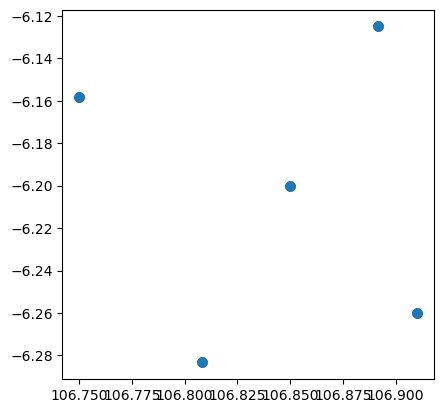

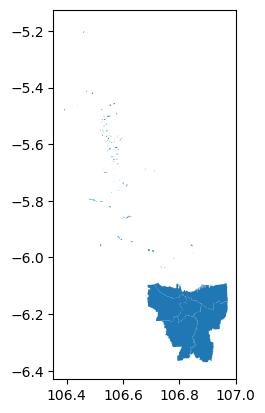

In [41]:
gdf_ispa.plot()
gdf_shapefile.plot()

In [42]:
#join all the variables
result = gdf_ispa.merge(gdf_shapefile, on = 'KABKOT')
result['geometry'] = result['geometry_y']
result = gpd.GeoDataFrame(result)
result_pop = result[['longitude', 'latitude', 'ispa_5y', 'month', 'year', 'KABKOT', 'geometry', 'time']]

<Axes: >

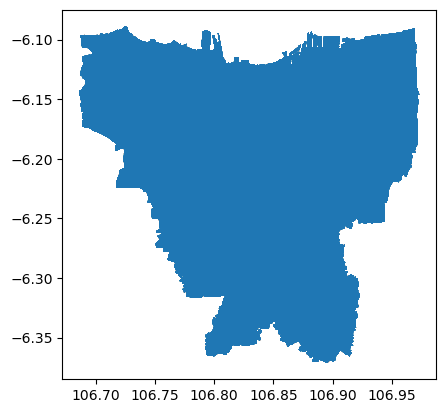

In [43]:
result_pop.plot()

In [44]:
result_pop.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   longitude  300 non-null    float64 
 1   latitude   300 non-null    float64 
 2   ispa_5y    300 non-null    int64   
 3   month      300 non-null    int64   
 4   year       300 non-null    int64   
 5   KABKOT     300 non-null    object  
 6   geometry   300 non-null    geometry
 7   time       300 non-null    object  
dtypes: float64(2), geometry(1), int64(3), object(2)
memory usage: 18.9+ KB


In [45]:
# Identify rows in gdf_excel that don't have a match in the result
non_matching_rows = gdf_ispa[~gdf_ispa.index.isin(result.index)]
print(non_matching_rows)

Empty GeoDataFrame
Columns: [Unnamed: 0.1, Unnamed: 0, KABKOT, month, year, longitude, latitude, pm2p5, time, RH, t2m, tp, ispa, pm10, so2, ispa_balita, ispa_5y, geometry]
Index: []


**SHOW THE COLUMNS**

In [46]:
# Dissolve berdasarkan 'KABKOT' dan 'month' dengan fungsi agregasi mean
dissolved_result = result_pop.dissolve(by=['KABKOT', 'month', 'year'])

# Reset indeks untuk membuat kolom 'KABKOT' 'month', dan 'year' menjadi kolom
dissolved_result.reset_index(inplace=True)

dissolved_result.head()

,KABKOT,month,year,geometry,longitude,latitude,ispa_5y,time
0,JAKARTA BARAT,1,2018,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71...",106.75,-6.158333,21514,2018-01-01
1,JAKARTA BARAT,1,2019,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71...",106.75,-6.158333,21402,2019-01-01
2,JAKARTA BARAT,1,2020,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71...",106.75,-6.158333,28072,2020-01-01
3,JAKARTA BARAT,1,2021,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71...",106.75,-6.158333,6443,2021-01-01
4,JAKARTA BARAT,1,2022,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71...",106.75,-6.158333,13408,2022-01-01


In [47]:
dissolved_result

,KABKOT,month,year,geometry,longitude,latitude,ispa_5y,time
0,JAKARTA BARAT,1,2018,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71...",106.750000,-6.158333,21514,2018-01-01
1,JAKARTA BARAT,1,2019,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71...",106.750000,-6.158333,21402,2019-01-01
2,JAKARTA BARAT,1,2020,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71...",106.750000,-6.158333,28072,2020-01-01
3,JAKARTA BARAT,1,2021,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71...",106.750000,-6.158333,6443,2021-01-01
4,JAKARTA BARAT,1,2022,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71...",106.750000,-6.158333,13408,2022-01-01
...,...,...,...,...,...,...,...,...
295,JAKARTA UTARA,12,2018,"POLYGON Z ((106.72568 -6.08938 0.00000, 106.72...",106.891667,-6.125000,18216,2018-12-01
296,JAKARTA UTARA,12,2019,"POLYGON Z ((106.72568 -6.08938 0.00000, 106.72...",106.891667,-6.125000,22118,2019-12-01
297,JAKARTA UTARA,12,2020,"POLYGON Z ((106.72568 -6.08938 0.00000, 106.72...",106.891667,-6.125000,3194,2020-12-01
298,JAKARTA UTARA,12,2021,"POLYGON Z ((106.72568 -6.08938 0.00000, 106.72...",106.891667,-6.125000,7909,2021-12-01


**SET FOR MAPPING**

In [48]:
# ubah per month
import pandas as pd

In [49]:
dissolved_result_df = pd.DataFrame(dissolved_result.drop(['geometry'],axis = 1))
#dissolved_result_df = dissolved_result_df.drop(['geometry'], axis=1) #kolom geometry di hapus

In [50]:
#untuk mengurutkan file berdasarkan
dissolved_result_df = dissolved_result_df.sort_values(by=[ 'year', 'KABKOT', 'month'])

In [51]:
polygon_result = gpd.sjoin(gdf_shapefile, dissolved_result, how='inner', predicate='intersects')

In [52]:
print(polygon_result.columns)

Index(['PROVNO', 'KABKOTNO', 'PROVINSI', 'KABKOT_left', 'geometry',
       'index_right', 'KABKOT_right', 'month', 'year', 'longitude', 'latitude',
       'ispa_5y', 'time'],
      dtype='object')


**MAPPING**

In [53]:
import calendar
import matplotlib.pyplot as plt
import math

Peta Kejadian ISPA Tahun 2018-2022

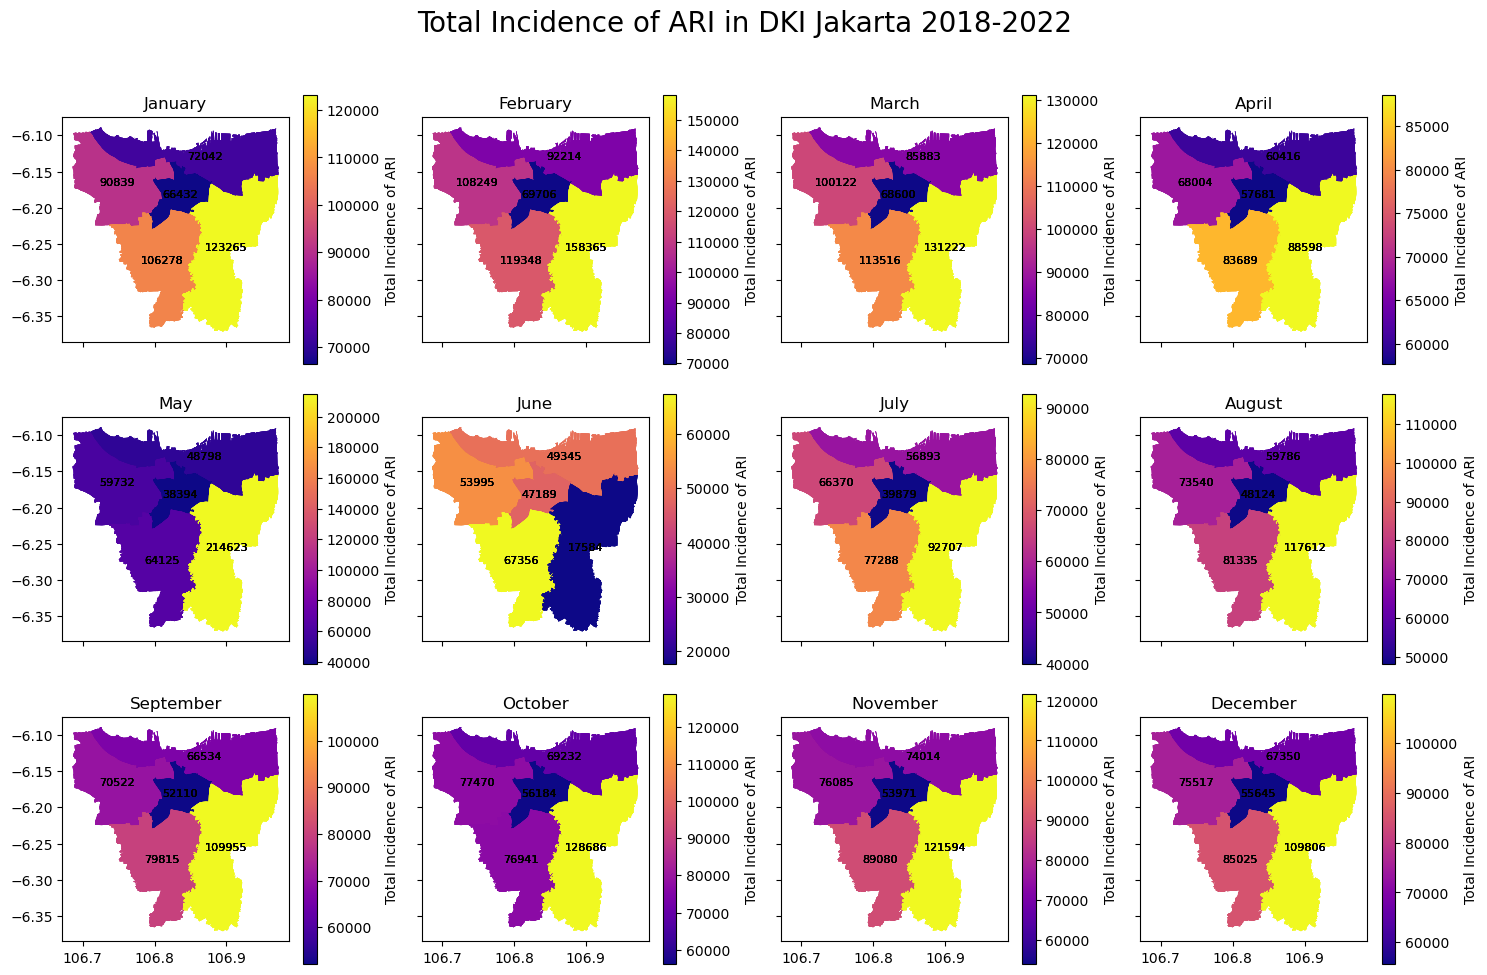

In [54]:
# Filter data for the years 2018 to 2022
data_2018_2022 = dissolved_result[(dissolved_result['year'] >= 2018) & (dissolved_result['year'] <= 2022)]

# Create a figure with subplots for each month
fig, axs = plt.subplots(3, 4, figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle('Total Incidence of ARI in DKI Jakarta 2018-2022', fontsize=20)

# Iterate through each month and plot the data for the years 2018 to 2022
for month, ax in zip(range(1, 13), axs.flatten()):
    # Filter data for the current month and years 2020 to 2022
    data_monthly = data_2018_2022[data_2018_2022['month'] == month]

    # Calculate the total ISPA cases for each Kabupaten/Kota for the current month
    total_ispa_per_kabkot = data_monthly.groupby(['KABKOT'])['ispa_5y'].sum().reset_index()

    # Merge the total ISPA cases back to the GeoDataFrame for the current month
    data_monthly_total_ispa = data_monthly.merge(total_ispa_per_kabkot, on='KABKOT', how='left', suffixes=('_original', '_total'))

    # Plot the map for the current month
    data_monthly_total_ispa.plot(ax=ax, column="ispa_5y_total", legend=True, legend_kwds={"label": "Total Incidence of ARI"})

    # Annotate each polygon with total ISPA cases value
    for idx, row in data_monthly_total_ispa.iterrows():
        ax.text(row.geometry.centroid.x, row.geometry.centroid.y, f"{row['ispa_5y_total']:.0f}", fontsize=8, ha='center', va='center')

    ax.set_title(calendar.month_name[month])  # Using calendar module to get the month name

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

cmap = plt.get_cmap('plasma')
plt.set_cmap(cmap)

# Show the plot
plt.show()

**GRAPHS**

In [55]:
import calendar
import matplotlib.pyplot as plt

In [56]:
# Format for monthly graph
dissolved_result_df['month_name'] = pd.to_datetime(dissolved_result_df['month'], format='%m').dt.month_name()

# Set the ['month_name'] as an index
dissolved_result_df= dissolved_result_df.set_index('month_name')

In [57]:
dissolved_result

,KABKOT,month,year,geometry,longitude,latitude,ispa_5y,time
0,JAKARTA BARAT,1,2018,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71...",106.750000,-6.158333,21514,2018-01-01
1,JAKARTA BARAT,1,2019,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71...",106.750000,-6.158333,21402,2019-01-01
2,JAKARTA BARAT,1,2020,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71...",106.750000,-6.158333,28072,2020-01-01
3,JAKARTA BARAT,1,2021,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71...",106.750000,-6.158333,6443,2021-01-01
4,JAKARTA BARAT,1,2022,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71...",106.750000,-6.158333,13408,2022-01-01
...,...,...,...,...,...,...,...,...
295,JAKARTA UTARA,12,2018,"POLYGON Z ((106.72568 -6.08938 0.00000, 106.72...",106.891667,-6.125000,18216,2018-12-01
296,JAKARTA UTARA,12,2019,"POLYGON Z ((106.72568 -6.08938 0.00000, 106.72...",106.891667,-6.125000,22118,2019-12-01
297,JAKARTA UTARA,12,2020,"POLYGON Z ((106.72568 -6.08938 0.00000, 106.72...",106.891667,-6.125000,3194,2020-12-01
298,JAKARTA UTARA,12,2021,"POLYGON Z ((106.72568 -6.08938 0.00000, 106.72...",106.891667,-6.125000,7909,2021-12-01


Grafik Tren ISPA Tahun 2018-2022

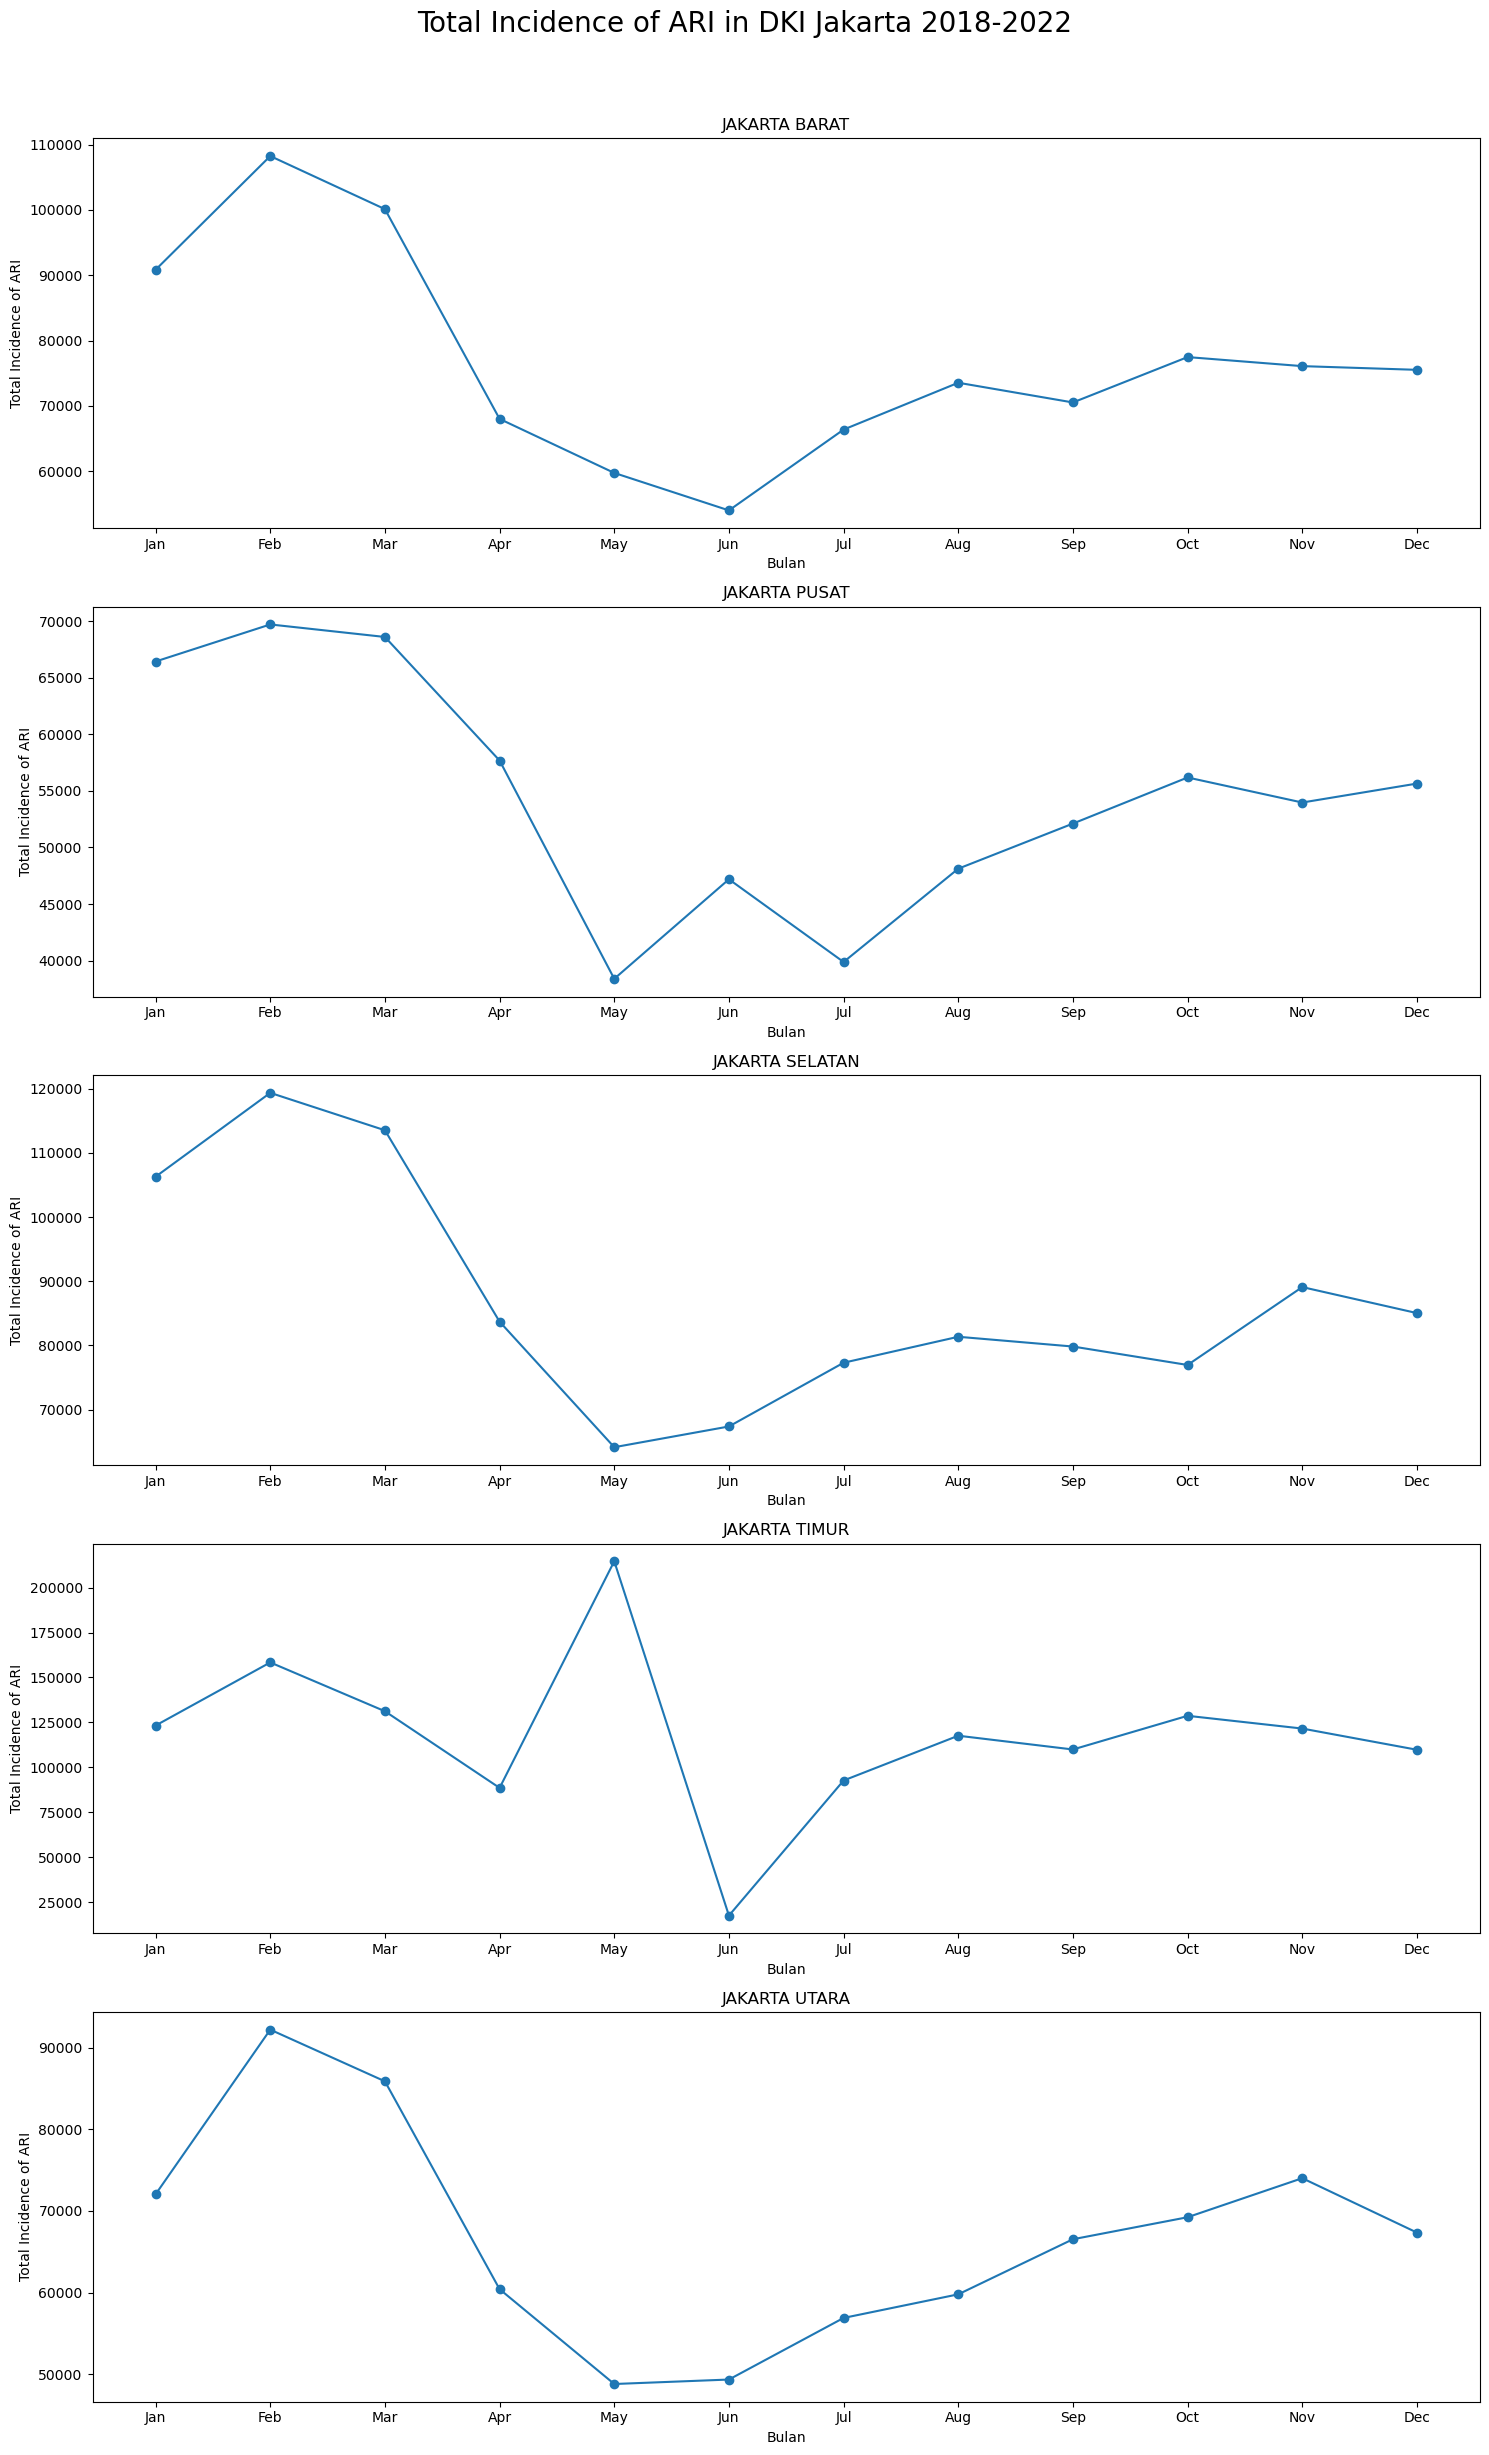

In [59]:
fig = plt.figure(figsize=(15, 25))
fig.suptitle('Total Incidence of ARI in DKI Jakarta 2018-2022', fontsize=20)
cities = list(dissolved_result_df['KABKOT'].unique())
data_2022 = dissolved_result_df[(dissolved_result_df['year'] >= 2018) & (dissolved_result_df['year'] <= 2022)]

# Iterate through each city and plot the average values for the year 2022
for idx, city in enumerate(cities, start=1):
    # Filter data for the current city and year
    data_city = data_2022[(data_2022['KABKOT'] == city)]

    # Calculate the monthly averages
    monthly_sum = data_city.groupby('month')['ispa_5y'].sum()

    # Plot the map for the current city
    plt.subplot(len(cities), 1, idx)
    plt.plot(monthly_sum, marker='o')
    plt.title(city)
    plt.xlabel('Bulan')
    plt.ylabel('Total Incidence of ARI')
    plt.xticks(range(1, 13), [calendar.month_abbr[i] for i in range(1, 13)])  # Display month names

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()

Grafik Tren ISPA Tahun 2022

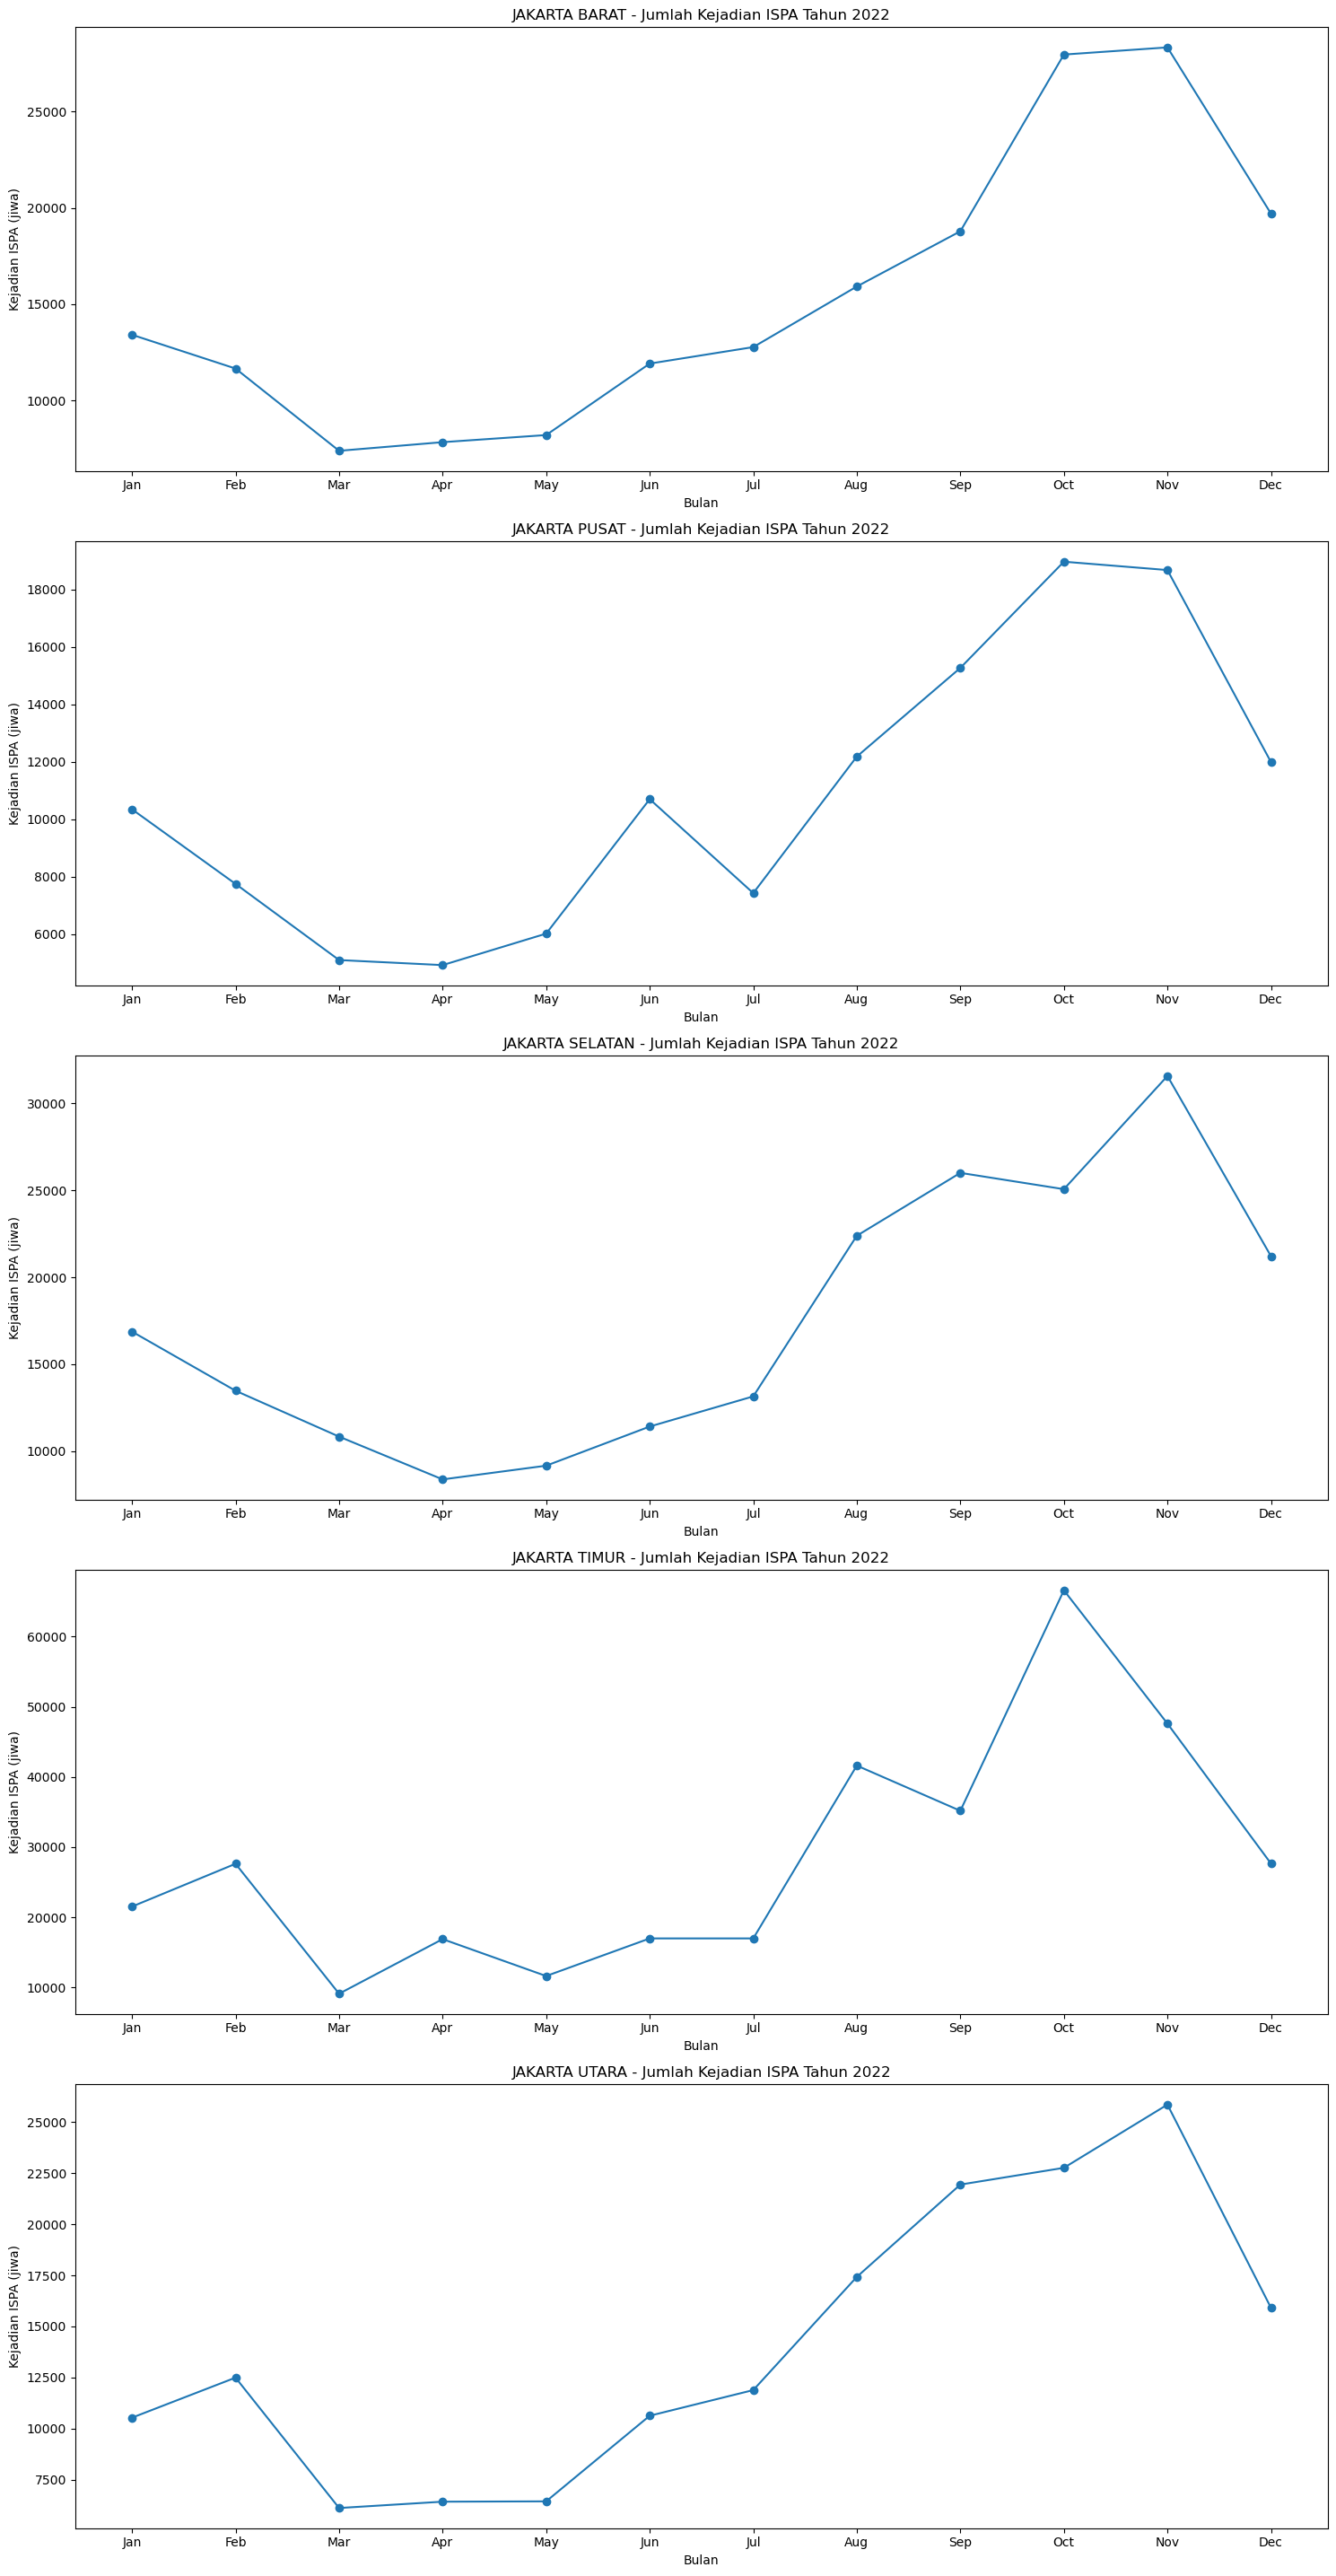

In [60]:
fig = plt.figure(figsize=(15, 30))
cities = list(dissolved_result_df['KABKOT'].unique())

# Iterate through each city and plot the average values for the year 2022
for idx, city in enumerate(cities, start=1):
    # Filter data for the current city and year
    data_city_2022 = dissolved_result_df[(dissolved_result_df['KABKOT'] == city) & (dissolved_result_df['year'] == 2022)]

    # Calculate the monthly averages
    monthly_avg = data_city_2022.groupby('month')['ispa_5y'].mean()

    # Plot the map for the current city
    plt.subplot(len(cities), 1, idx)
    plt.plot(monthly_avg, marker='o')
    plt.title(f'{city} - Jumlah Kejadian ISPA Tahun 2022')
    plt.xlabel('Bulan')
    plt.ylabel('Kejadian ISPA (jiwa)')
    plt.xticks(range(1, 13), [calendar.month_abbr[i] for i in range(1, 13)])  # Display month names

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()